# Appendix IX


## Data Normalisation and Preparation
## Price, Volume, Inter-tick intervals

#### Forex EUR/USD from Dukastcopy Bank

#### Price normalisation: subtract the minimum divide by the maximum price among 200 ticks that include this tick
##### Normalisation of volumes - based on a maximum of 10 lots (the main number of lots). The interval (from 10 to 5000 lots) are equated to 10 lots (those to 1 after normalisation)
##### We normalise the intervals between ticks - based on a maximum of 20,000 milliseconds (20 seconds) (the main number of intervals). The interval (from 20,000) are equated to 20,000 milliseconds (those to 1 after normalization)

### Import

In [1]:
import numpy as np                  
import pandas as pd                 

import matplotlib.pyplot as plt
#from scipy.misc import toimage
%matplotlib inline 

In [2]:
import tensorflow as tf
from tensorflow import keras


In [3]:
print(tf.__version__)

2.10.0-dev20220604


### Data

In [19]:
data = pd.read_csv('Data/EURUSD_ticks_2018-4.csv.')

print(data.head(n=3)) 
print(data[-3:]) 

                      Date      Bid      Ask  Vol_Bid  Vol_Ask
0  2018.01.01 22:00:08.661  1.20102  1.20143      1.5     0.75
1  2018.01.01 22:00:08.895  1.20102  1.20148      1.5     1.50
2  2018.01.01 22:00:10.634  1.20102  1.20147      1.5     0.75
                            Date      Bid      Ask  Vol_Bid  Vol_Ask
8543873  2018.04.29 22:59:51.669  1.21212  1.21216     2.62      1.0
8543874  2018.04.29 22:59:52.267  1.21213  1.21215     1.00      1.0
8543875  2018.04.29 22:59:58.734  1.21213  1.21216     1.00      1.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543876 entries, 0 to 8543875
Data columns (total 5 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Date     object 
 1   Bid      float64
 2   Ask      float64
 3   Vol_Bid  float64
 4   Vol_Ask  float64
dtypes: float64(4), object(1)
memory usage: 325.9+ MB


#### MAXs & MINs

In [21]:
mxB  = data['Bid'].max()
mnB  = data['Bid'].min()
mxA  = data['Ask'].max()
mnA  = data['Ask'].min()
mxVB = data['Vol_Bid'].max()
mnVB = data['Vol_Bid'].min()
mxVA = data['Vol_Ask'].max()
mnVA = data['Vol_Ask'].min()

maxPrice = mxA
minPrice = mnB

if mxVB > mxVA:
    maxVolume = mxVB
else:
    maxVolume = mxVA

if mnVB < mnVA:
    minVolume = mnVB
else:
    minVolume = mnVA    
    
print('Max Bid = ',mxB)
print('Min Bid = ',mnB)
print('Max Ask = ',mxA)
print('Min Ask = ',mnA)
print('Max Price = ',maxPrice)
print('Min Price = ',minPrice)

maxPriceUse = 1.26
minPriceUse = 1.12
minPriceUse1 = 1.19 
print('Max Price Use = ',maxPriceUse)
print('Min Price Use = ',minPriceUse)
print('Min Price Use 1 = ',minPriceUse1)

print('Max Volume Bid = ',mxVB)
print('Min Volume Bid = ',mnVB)
print('Max Volume Ask = ',mxVA)
print('Min Volume Ask = ',mnVA)
print('Max Volume = ',maxVolume)
print('Min Volume = ',minVolume)

maxVolumeUse = 10
print('Max Volume Use = ',maxVolumeUse)

Max Bid =  1.25553
Min Bid =  1.19156
Max Ask =  1.25556
Min Ask =  1.1915799999999999
Max Price =  1.25556
Min Price =  1.19156
Max Price Use =  1.26
Min Price Use =  1.12
Min Price Use 1 =  1.19
Max Volume Bid =  5242.35
Min Volume Bid =  0.1
Max Volume Ask =  5362.95
Min Volume Ask =  0.1
Max Volume =  5362.95
Min Volume =  0.1
Max Volume Use =  10


In [22]:
pd.to_datetime(['31/07/2017', 'test'], errors='coerce') 

data['DateT'] = pd.to_datetime(data['Date'])
print(data.dtypes)
print(data.head(n=5))

Date               object
Bid               float64
Ask               float64
Vol_Bid           float64
Vol_Ask           float64
DateT      datetime64[ns]
dtype: object
                      Date      Bid      Ask  Vol_Bid  Vol_Ask  \
0  2018.01.01 22:00:08.661  1.20102  1.20143      1.5     0.75   
1  2018.01.01 22:00:08.895  1.20102  1.20148      1.5     1.50   
2  2018.01.01 22:00:10.634  1.20102  1.20147      1.5     0.75   
3  2018.01.01 22:00:11.223  1.20102  1.20148      1.5     1.50   
4  2018.01.01 22:00:29.530  1.20102  1.20145      1.5     0.75   

                    DateT  
0 2018-01-01 22:00:08.661  
1 2018-01-01 22:00:08.895  
2 2018-01-01 22:00:10.634  
3 2018-01-01 22:00:11.223  
4 2018-01-01 22:00:29.530  


### Normalisation Prices

In [23]:
DeltaNormal = maxPriceUse - minPriceUse
DeltaNormal_1 = maxPriceUse - minPriceUse1

data['Bid_N'] = (data['Bid'] - minPriceUse) / DeltaNormal
data['Ask_N'] = (data['Ask'] - minPriceUse) / DeltaNormal 

data['Bid_N_use'] = (data['Bid'] - minPriceUse1) / DeltaNormal_1
data['Ask_N_use'] = (data['Ask'] - minPriceUse1) / DeltaNormal_1 

print(data.dtypes)
print(data.head(n=5))
print(data[-5:]) 

Date                 object
Bid                 float64
Ask                 float64
Vol_Bid             float64
Vol_Ask             float64
DateT        datetime64[ns]
Bid_N               float64
Ask_N               float64
Bid_N_use           float64
Ask_N_use           float64
dtype: object
                      Date      Bid      Ask  Vol_Bid  Vol_Ask  \
0  2018.01.01 22:00:08.661  1.20102  1.20143      1.5     0.75   
1  2018.01.01 22:00:08.895  1.20102  1.20148      1.5     1.50   
2  2018.01.01 22:00:10.634  1.20102  1.20147      1.5     0.75   
3  2018.01.01 22:00:11.223  1.20102  1.20148      1.5     1.50   
4  2018.01.01 22:00:29.530  1.20102  1.20145      1.5     0.75   

                    DateT     Bid_N     Ask_N  Bid_N_use  Ask_N_use  
0 2018-01-01 22:00:08.661  0.578714  0.581643   0.157429   0.163286  
1 2018-01-01 22:00:08.895  0.578714  0.582000   0.157429   0.164000  
2 2018-01-01 22:00:10.634  0.578714  0.581929   0.157429   0.163857  
3 2018-01-01 22:00:11.223  0.

### Normalisation Volume

In [25]:

data['Vol_Bid_N'] = data['Vol_Bid'] / maxVolumeUse  
data['Vol_Ask_N'] = data['Vol_Ask'] / maxVolumeUse  


indexs_Big_Vol_Bid = data.index[data.Vol_Bid_N > 1]
indexs_Big_Vol_Ask = data.index[data.Vol_Ask_N > 1]
print('indexs_Big_Vol_Bid:  ', indexs_Big_Vol_Bid) 
print('\n')
print('indexs_Big_Vol_Ask:  ', indexs_Big_Vol_Ask)

indexs_Big_Vol_Bid:   Int64Index([   5295,    5297,    5298,    5302,    5398,    5399,    5499,
               5528,    5586,    5589,
            ...
            8539716, 8539794, 8539873, 8539875, 8539876, 8539879, 8539921,
            8540082, 8540334, 8542834],
           dtype='int64', length=87662)


indexs_Big_Vol_Ask:   Int64Index([   3933,    3937,    4287,    4288,    4476,    4510,    4778,
               4800,    4863,    4888,
            ...
            8539406, 8539408, 8539495, 8539641, 8539917, 8539952, 8539960,
            8539961, 8540049, 8540436],
           dtype='int64', length=95757)


In [26]:
data[data.Date == 1]  # checking

,Date,Bid,Ask,Vol_Bid,Vol_Ask,DateT,Bid_N,Ask_N,Bid_N_use,Ask_N_use,Vol_Bid_N,Vol_Ask_N


In [27]:

data['Vol_Ask_N'].loc[indexs_Big_Vol_Ask] = 1 
data['Vol_Bid_N'].loc[indexs_Big_Vol_Bid] = 1 

C:\Users\vital\anaconda3_\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [28]:
data[data.Date == 1]  # Checking

,Date,Bid,Ask,Vol_Bid,Vol_Ask,DateT,Bid_N,Ask_N,Bid_N_use,Ask_N_use,Vol_Bid_N,Vol_Ask_N


In [29]:
# range [0;1]
mmx  = data['Vol_Bid_N'].max()
mmn  = data['Vol_Bid_N'].min()
print(mmx, ' ', mmn)

mmx  = data['Vol_Ask_N'].max()
mmn  = data['Vol_Ask_N'].min()
print(mmx, ' ', mmn)

1.0   0.01
1.0   0.01


### Date normalisation

In [30]:
import datetime

In [32]:
n = data.shape[0]   

data['DateDelta'] = data['DateT'].astype('int64')  

data['DateDelta'] = data['DateDelta'].div(1000000 , axis=0)  
data['DateDelta'] = data['DateDelta'].astype('int64')    
data['DateDelta1'] = data['DateDelta'].diff()                                               


data['DateDelta1'].loc[0] = 0  
data['DateDelta1'] = data['DateDelta1'].astype(int)    #
    
print(data.dtypes)
print(data.head(n=3)) 
print(data[-3:]) 
print(data['DateDelta1'].loc[:4])



C:\Users\vital\anaconda3_\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Date                  object
Bid                  float64
Ask                  float64
Vol_Bid              float64
Vol_Ask              float64
DateT         datetime64[ns]
Bid_N                float64
Ask_N                float64
Bid_N_use            float64
Ask_N_use            float64
Vol_Bid_N            float64
Vol_Ask_N            float64
DateDelta              int64
DateDelta1             int32
dtype: object
                      Date      Bid      Ask  Vol_Bid  Vol_Ask  \
0  2018.01.01 22:00:08.661  1.20102  1.20143      1.5     0.75   
1  2018.01.01 22:00:08.895  1.20102  1.20148      1.5     1.50   
2  2018.01.01 22:00:10.634  1.20102  1.20147      1.5     0.75   

                    DateT     Bid_N     Ask_N  Bid_N_use  Ask_N_use  \
0 2018-01-01 22:00:08.661  0.578714  0.581643   0.157429   0.163286   
1 2018-01-01 22:00:08.895  0.578714  0.582000   0.157429   0.164000   
2 2018-01-01 22:00:10.634  0.578714  0.581929   0.157429   0.163857   

   Vol_Bid_N  Vol_Ask_N      D

In [33]:
mmx  = data['DateDelta1'].max()
mmn  = data['DateDelta1'].min()
print(mmx, ' ', mmn)

mmx  = data['DateDelta'].max()
mmn  = data['DateDelta'].min()
print(mmx, ' ', mmn)

172931549   0
1525042798734   1514844008661


In [39]:
# Weekends and date gups
#  DateDelta1 > 100000 mlsec
data[data.DateDelta1 > 169000000]

,Date,Bid,Ask,Vol_Bid,Vol_Ask,DateT,Bid_N,Ask_N,Bid_N_use,Ask_N_use,Vol_Bid_N,Vol_Ask_N,DateDelta,DateDelta1
322405,2018.01.07 22:00:04.850,1.20265,1.20297,0.75,0.75,2018-01-07 22:00:04.850,0.590357,0.592643,0.180714,0.185286,0.075,0.075,1515362404849,172808585
781883,2018.01.14 22:00:04.641,1.21933,1.21962,0.75,0.75,2018-01-14 22:00:04.641,0.709500,0.711571,0.419000,0.423143,0.075,0.075,1515967204641,172812314
1318286,2018.01.21 22:00:14.074,1.22702,1.22708,0.37,0.37,2018-01-21 22:00:14.074,0.764429,0.764857,0.528857,0.529714,0.037,0.037,1516572014073,172817937
1932893,2018.01.28 22:00:34.413,1.24232,1.24291,0.75,0.75,2018-01-28 22:00:34.413,0.873714,0.877929,0.747429,0.755857,0.075,0.075,1517176834413,172839215
2560927,2018.02.04 22:00:04.598,1.24320,1.24391,0.75,0.75,2018-02-04 22:00:04.598,0.880000,0.885071,0.760000,0.770143,0.075,0.075,1517781604598,172804645
3262667,2018.02.11 22:00:14.329,1.22483,1.22501,0.37,0.75,2018-02-11 22:00:14.329,0.748786,0.750071,0.497571,0.500143,0.037,0.075,1518386414329,172818210
3818770,2018.02.18 22:00:14.462,1.24015,1.24035,0.37,0.37,2018-02-18 22:00:14.462,0.858214,0.859643,0.716429,0.719286,0.037,0.037,1518991214462,172820488
4316953,2018.02.25 22:00:04.559,1.22928,1.22953,0.75,0.75,2018-02-25 22:00:04.559,0.780571,0.782357,0.561143,0.564714,0.075,0.075,1519596004559,172808442
4840754,2018.03.04 22:00:08.704,1.23248,1.23296,0.37,0.37,2018-03-04 22:00:08.704,0.803429,0.806857,0.606857,0.613714,0.037,0.037,1520200808704,172812099
5371812,2018.03.11 21:00:07.329,1.23094,1.23176,0.37,0.37,2018-03-11 21:00:07.329,0.792429,0.798286,0.584857,0.596571,0.037,0.037,1520802007329,169215702


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543876 entries, 0 to 8543875
Data columns (total 14 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Date        object        
 1   Bid         float64       
 2   Ask         float64       
 3   Vol_Bid     float64       
 4   Vol_Ask     float64       
 5   DateT       datetime64[ns]
 6   Bid_N       float64       
 7   Ask_N       float64       
 8   Bid_N_use   float64       
 9   Ask_N_use   float64       
 10  Vol_Bid_N   float64       
 11  Vol_Ask_N   float64       
 12  DateDelta   int64         
 13  DateDelta1  int32         
dtypes: datetime64[ns](1), float64(10), int32(1), int64(1), object(1)
memory usage: 880.0+ MB


In [46]:
maxDateDelta1 = 20000

data['DateDelta1_N'] = data['DateDelta1'] / maxDateDelta1  

indexs_Big_DateDelta1 = data.index[data.DateDelta1_N > 1]
print('indexs_Big_DateDelta1:  ', indexs_Big_DateDelta1) 

indexs_Big_DateDelta1:   Int64Index([      5,      11,      28,      48,      89,     147,     149,
                159,     237,     624,
            ...
            8542705, 8542738, 8542750, 8542866, 8543548, 8543562, 8543615,
            8543629, 8543649, 8543787],
           dtype='int64', length=7374)


In [47]:
data[data.DateDelta1 > 100000]

,Date,Bid,Ask,Vol_Bid,Vol_Ask,DateT,Bid_N,Ask_N,Bid_N_use,Ask_N_use,Vol_Bid_N,Vol_Ask_N,DateDelta,DateDelta1,DateDelta1_N
93764,2018.01.03 03:44:03.184,1.20463,1.20467,4.69,2.25,2018-01-03 03:44:03.184,0.604500,0.604786,0.209000,0.209571,0.469,0.225,1514951043184,102833,5.14165
322405,2018.01.07 22:00:04.850,1.20265,1.20297,0.75,0.75,2018-01-07 22:00:04.850,0.590357,0.592643,0.180714,0.185286,0.075,0.075,1515362404849,172808585,8640.42925
781883,2018.01.14 22:00:04.641,1.21933,1.21962,0.75,0.75,2018-01-14 22:00:04.641,0.709500,0.711571,0.419000,0.423143,0.075,0.075,1515967204641,172812314,8640.61570
1318286,2018.01.21 22:00:14.074,1.22702,1.22708,0.37,0.37,2018-01-21 22:00:14.074,0.764429,0.764857,0.528857,0.529714,0.037,0.037,1516572014073,172817937,8640.89685
1932893,2018.01.28 22:00:34.413,1.24232,1.24291,0.75,0.75,2018-01-28 22:00:34.413,0.873714,0.877929,0.747429,0.755857,0.075,0.075,1517176834413,172839215,8641.96075
2560927,2018.02.04 22:00:04.598,1.24320,1.24391,0.75,0.75,2018-02-04 22:00:04.598,0.880000,0.885071,0.760000,0.770143,0.075,0.075,1517781604598,172804645,8640.23225
3262667,2018.02.11 22:00:14.329,1.22483,1.22501,0.37,0.75,2018-02-11 22:00:14.329,0.748786,0.750071,0.497571,0.500143,0.037,0.075,1518386414329,172818210,8640.91050
3818770,2018.02.18 22:00:14.462,1.24015,1.24035,0.37,0.37,2018-02-18 22:00:14.462,0.858214,0.859643,0.716429,0.719286,0.037,0.037,1518991214462,172820488,8641.02440
4316953,2018.02.25 22:00:04.559,1.22928,1.22953,0.75,0.75,2018-02-25 22:00:04.559,0.780571,0.782357,0.561143,0.564714,0.075,0.075,1519596004559,172808442,8640.42210
4840754,2018.03.04 22:00:08.704,1.23248,1.23296,0.37,0.37,2018-03-04 22:00:08.704,0.803429,0.806857,0.606857,0.613714,0.037,0.037,1520200808704,172812099,8640.60495


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543876 entries, 0 to 8543875
Data columns (total 15 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Date          object        
 1   Bid           float64       
 2   Ask           float64       
 3   Vol_Bid       float64       
 4   Vol_Ask       float64       
 5   DateT         datetime64[ns]
 6   Bid_N         float64       
 7   Ask_N         float64       
 8   Bid_N_use     float64       
 9   Ask_N_use     float64       
 10  Vol_Bid_N     float64       
 11  Vol_Ask_N     float64       
 12  DateDelta     int64         
 13  DateDelta1    int32         
 14  DateDelta1_N  float64       
dtypes: datetime64[ns](1), float64(11), int32(1), int64(1), object(1)
memory usage: 945.2+ MB


In [49]:
data[data.Date == 1] 

,Date,Bid,Ask,Vol_Bid,Vol_Ask,DateT,Bid_N,Ask_N,Bid_N_use,Ask_N_use,Vol_Bid_N,Vol_Ask_N,DateDelta,DateDelta1,DateDelta1_N


In [50]:
data['DateDelta1_N'].loc[indexs_Big_DateDelta1] = 1 

C:\Users\vital\anaconda3_\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [51]:
data[data.Date == 1]

,Date,Bid,Ask,Vol_Bid,Vol_Ask,DateT,Bid_N,Ask_N,Bid_N_use,Ask_N_use,Vol_Bid_N,Vol_Ask_N,DateDelta,DateDelta1,DateDelta1_N


In [52]:
print(data.dtypes)
print(data.head(n=10)) 
print(data[-10:]) 

Date                    object
Bid                    float64
Ask                    float64
Vol_Bid                float64
Vol_Ask                float64
DateT           datetime64[ns]
Bid_N                  float64
Ask_N                  float64
Bid_N_use              float64
Ask_N_use              float64
Vol_Bid_N              float64
Vol_Ask_N              float64
DateDelta                int64
DateDelta1               int32
DateDelta1_N           float64
dtype: object
                      Date      Bid      Ask  Vol_Bid  Vol_Ask  \
0  2018.01.01 22:00:08.661  1.20102  1.20143     1.50     0.75   
1  2018.01.01 22:00:08.895  1.20102  1.20148     1.50     1.50   
2  2018.01.01 22:00:10.634  1.20102  1.20147     1.50     0.75   
3  2018.01.01 22:00:11.223  1.20102  1.20148     1.50     1.50   
4  2018.01.01 22:00:29.530  1.20102  1.20145     1.50     0.75   
5  2018.01.01 22:00:52.173  1.20102  1.20145     1.50     0.75   
6  2018.01.01 22:00:52.224  1.20102  1.20148     1.50     1

In [53]:
mmx  = data['DateDelta1_N'].max()
mmn  = data['DateDelta1_N'].min()
print(mmx, ' ', mmn)

1.0   0.0


In [54]:
print(data.head(n=0)) 

Empty DataFrame
Columns: [Date, Bid, Ask, Vol_Bid, Vol_Ask, DateT, Bid_N, Ask_N, Bid_N_use, Ask_N_use, Vol_Bid_N, Vol_Ask_N, DateDelta, DateDelta1, DateDelta1_N]
Index: []


In [55]:
data = data[['Vol_Ask_N','Ask_N_use','DateDelta1_N','Bid_N_use','Vol_Bid_N',  
            'Date','Bid','Ask','Vol_Bid','Vol_Ask','DateT','Bid_N','Ask_N','DateDelta','DateDelta1']]
print(data.head(n=2)) 
print(data[-2:]) 

   Vol_Ask_N  Ask_N_use  DateDelta1_N  Bid_N_use  Vol_Bid_N  \
0      0.075   0.163286        0.0000   0.157429       0.15   
1      0.150   0.164000        0.0117   0.157429       0.15   

                      Date      Bid      Ask  Vol_Bid  Vol_Ask  \
0  2018.01.01 22:00:08.661  1.20102  1.20143      1.5     0.75   
1  2018.01.01 22:00:08.895  1.20102  1.20148      1.5     1.50   

                    DateT     Bid_N     Ask_N      DateDelta  DateDelta1  
0 2018-01-01 22:00:08.661  0.578714  0.581643  1514844008661           0  
1 2018-01-01 22:00:08.895  0.578714  0.582000  1514844008895         234  
         Vol_Ask_N  Ask_N_use  DateDelta1_N  Bid_N_use  Vol_Bid_N  \
8543874        0.1   0.316429       0.02990   0.316143        0.1   
8543875        0.1   0.316571       0.32335   0.316143        0.1   

                            Date      Bid      Ask  Vol_Bid  Vol_Ask  \
8543874  2018.04.29 22:59:52.267  1.21213  1.21215      1.0      1.0   
8543875  2018.04.29 22:59:58.734  

In [56]:
mmx  = data['Vol_Ask_N'].max()
mmn  = data['Vol_Ask_N'].min()
print(mmx,' ', mmn)
mmx  = data['Ask_N_use'].max()
mmn  = data['Ask_N_use'].min()
print(mmx,' ', mmn)
mmx  = data['DateDelta1_N'].max()
mmn  = data['DateDelta1_N'].min()
print(mmx,' ', mmn)
mmx  = data['Bid_N_use'].max()
mmn  = data['Bid_N_use'].min()
print(mmx,' ', mmn)
mmx  = data['Vol_Bid_N'].max()
mmn  = data['Vol_Bid_N'].min()
print(mmx,' ', mmn)
mmx  = data['Bid_N'].max()
mmn  = data['Bid_N'].min()
print(mmx,' ', mmn)
mmx  = data['Ask_N'].max()
mmn  = data['Ask_N'].min()
print(mmx,' ', mmn)

1.0   0.01
0.9365714285714286   0.022571428571427334
1.0   0.0
0.9361428571428576   0.02228571428571435
1.0   0.01
0.9680714285714287   0.5111428571428563
0.9682857142857143   0.5112857142857129


In [57]:

data_4_mth=data.drop(['Date','Bid','Ask','Vol_Bid','Vol_Ask','DateT','Bid_N','Ask_N','DateDelta','DateDelta1'],axis=1) 
data_4_mth_All=data.drop(['Date','Bid','Ask','Vol_Bid','Vol_Ask','DateT','Bid_N_use','Ask_N_use','DateDelta','DateDelta1'],axis=1)

data_4_mth_All = data_4_mth_All[['Vol_Ask_N','Ask_N','DateDelta1_N','Bid_N','Vol_Bid_N']]

print(data_4_mth.head(n=2)) 
print(data_4_mth[-2:]) 
print('\n')
print(data_4_mth_All.head(n=2)) 
print(data_4_mth_All[-2:]) 

   Vol_Ask_N  Ask_N_use  DateDelta1_N  Bid_N_use  Vol_Bid_N
0      0.075   0.163286        0.0000   0.157429       0.15
1      0.150   0.164000        0.0117   0.157429       0.15
         Vol_Ask_N  Ask_N_use  DateDelta1_N  Bid_N_use  Vol_Bid_N
8543874        0.1   0.316429       0.02990   0.316143        0.1
8543875        0.1   0.316571       0.32335   0.316143        0.1


   Vol_Ask_N     Ask_N  DateDelta1_N     Bid_N  Vol_Bid_N
0      0.075  0.581643        0.0000  0.578714       0.15
1      0.150  0.582000        0.0117  0.578714       0.15
         Vol_Ask_N     Ask_N  DateDelta1_N     Bid_N  Vol_Bid_N
8543874        0.1  0.658214       0.02990  0.658071        0.1
8543875        0.1  0.658286       0.32335  0.658071        0.1


In [ ]:


file_obj1 = open('Tick/EURUSD_tick_4mth.csv', 'w')
data_4_mth.to_csv('Tick/EURUSD_tick_4mth.csv', 
                  encoding='utf-8', index=False)
file_obj1.close()

file_obj2 = open('Tick/EURUSD_tick_4mth_All.csv', 'w')
data_4_mth_All.to_csv('Tick/EURUSD_tick_4mth_All.csv', 
                  encoding='utf-8', index=False)
file_obj2.close()

In [58]:
n_start = 0  
n_small = 1100000  # 2 weeks
print('n_start = ',n_start, '\n', 
      'n_small = ', n_small)

n_start =  0 
 n_small =  1100000


In [59]:
data_4_mth_1week =  data_4_mth[n_start:n_small]
data_4_mth_All_1week = data_4_mth_All[n_start:n_small]

print(data_4_mth.iloc[[n_start,n_start+1],]) 
print(data_4_mth.iloc[[n_small-2,n_small-1],]) 
print('\n')
print(data_4_mth_1week.head(n=2))
print(data_4_mth_1week[-2:]) 
print('\n')
print(data_4_mth_All.iloc[[n_start,n_start+1],]) 
print(data_4_mth_All.iloc[[n_small-2,n_small-1],]) 
print('\n')
print(data_4_mth_All_1week.head(n=2)) 
print(data_4_mth_All_1week[-2:]) 


   Vol_Ask_N  Ask_N_use  DateDelta1_N  Bid_N_use  Vol_Bid_N
0      0.075   0.163286        0.0000   0.157429       0.15
1      0.150   0.164000        0.0117   0.157429       0.15
         Vol_Ask_N  Ask_N_use  DateDelta1_N  Bid_N_use  Vol_Bid_N
1099998      0.150   0.453714       0.00285   0.453286      0.107
1099999      0.244   0.454143       0.01315   0.453571      0.307


   Vol_Ask_N  Ask_N_use  DateDelta1_N  Bid_N_use  Vol_Bid_N
0      0.075   0.163286        0.0000   0.157429       0.15
1      0.150   0.164000        0.0117   0.157429       0.15
         Vol_Ask_N  Ask_N_use  DateDelta1_N  Bid_N_use  Vol_Bid_N
1099998      0.150   0.453714       0.00285   0.453286      0.107
1099999      0.244   0.454143       0.01315   0.453571      0.307


   Vol_Ask_N     Ask_N  DateDelta1_N     Bid_N  Vol_Bid_N
0      0.075  0.581643        0.0000  0.578714       0.15
1      0.150  0.582000        0.0117  0.578714       0.15
         Vol_Ask_N     Ask_N  DateDelta1_N     Bid_N  Vol_Bid_N
10

In [ ]:

file_obj3 = open('Tick/EURUSD_tick_4mth_1week.csv', 'w')
data_4_mth_1week.to_csv('Tick/EURUSD_tick_4mth_1week.csv', 
                        encoding='utf-8', index=False)
file_obj3.close()

file_obj4 = open('Tick/EURUSD_tick_4mth_All_1week.csv', 'w')
data_4_mth_All_1week.to_csv('Tick/EURUSD_tick_4mth_All_1week.csv', 
                            encoding='utf-8', index=False)
file_obj4.close()

### Time intervals

In [60]:
# delta ticks
data_Delta_Time  = data['DateDelta1']

print('data_Delta_Time', data_Delta_Time.dtypes)
print(data_Delta_Time[:5]) 
print(data_Delta_Time[-5:]) 

data_Delta_Time int32
0        0
1      234
2     1738
3      590
4    18306
Name: DateDelta1, dtype: int32
8543871    4269
8543872    1141
8543873     103
8543874     598
8543875    6467
Name: DateDelta1, dtype: int32


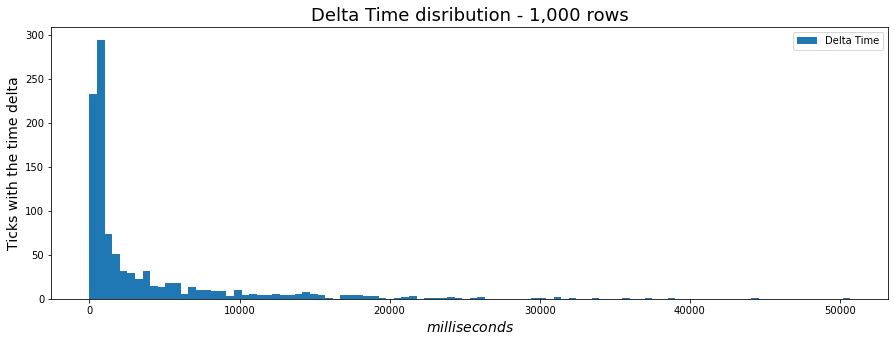

In [66]:
# first 1.000 rows

indexes_to_drop = np.array(range(1000,8543876))
indexes_to_keep = set(range(data_Delta_Time.shape[0])) - set(indexes_to_drop)

data_Delta_Time_Test = data_Delta_Time.take(list(indexes_to_keep))

data_Delta_Time_Test_1 = np.array(data_Delta_Time_Test) 
data_Delta_Time_Test_1 = data_Delta_Time_Test_1.reshape(1000)

plt.figure(num=1, figsize=(15,5))

plt.hist(data_Delta_Time_Test_1, bins=100, label='Delta Time') 


plt.title('Delta Time disribution - 1,000 rows', size=18)
plt.ylabel('Ticks with the time delta', size=14)
plt.xlabel('$milliseconds$', size=14)
plt.legend(loc='upper right') 
#  PNG


In [ ]:
plt.savefig('Figures/TimeDisribution-1000_rows.png')

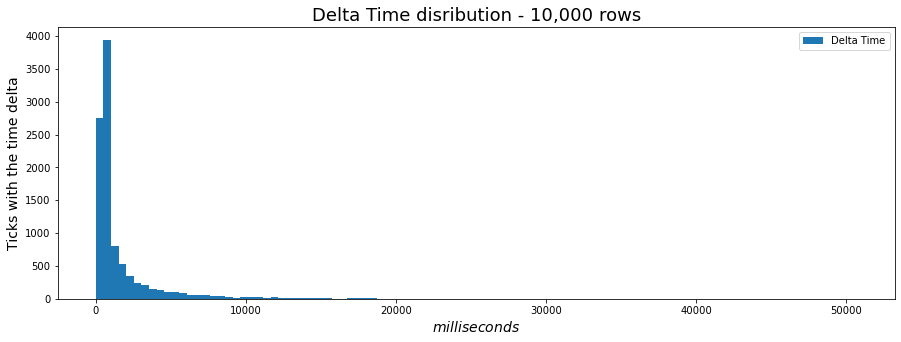

In [67]:
# first 10.000 rows

indexes_to_drop = np.array(range(10000,8543876))
indexes_to_keep = set(range(data_Delta_Time.shape[0])) - set(indexes_to_drop)
data_Delta_Time_Test = data_Delta_Time.take(list(indexes_to_keep))

data_Delta_Time_Test_1 = np.array(data_Delta_Time_Test) 
data_Delta_Time_Test_1 = data_Delta_Time_Test_1.reshape(10000)

plt.figure(num=1, figsize=(15,5))
plt.hist(data_Delta_Time_Test_1, bins=100, label='Delta Time') 

plt.title('Delta Time disribution - 10,000 rows', size=18)
plt.ylabel('Ticks with the time delta', size=14)
plt.xlabel('$milliseconds$', size=14)
plt.legend(loc='upper right') 
#  PNG

In [ ]:
plt.savefig('Figures/TimeDisribution-10000_rows.png')

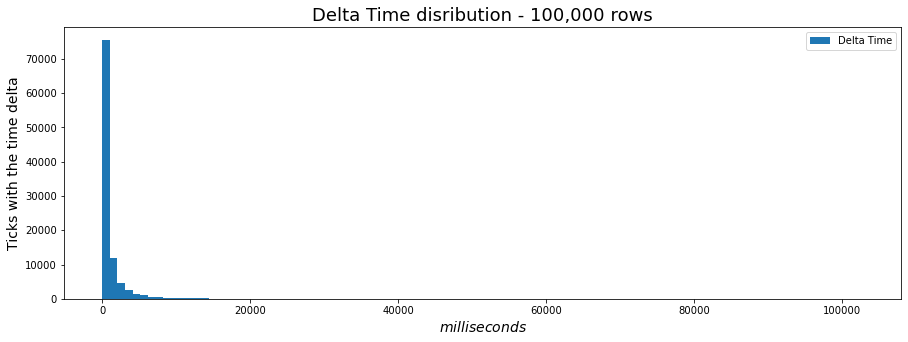

In [68]:
# first 100.000 rows

indexes_to_drop = np.array(range(100000,8543876))
indexes_to_keep = set(range(data_Delta_Time.shape[0])) - set(indexes_to_drop)

data_Delta_Time_Test = data_Delta_Time.take(list(indexes_to_keep))

data_Delta_Time_Test_1 = np.array(data_Delta_Time_Test) 
data_Delta_Time_Test_1 = data_Delta_Time_Test_1.reshape(100000)

plt.figure(num=1, figsize=(15,5))
plt.hist(data_Delta_Time_Test_1, bins=100, label='Delta Time') 

plt.title('Delta Time disribution - 100,000 rows', size=18)
plt.ylabel('Ticks with the time delta', size=14)
plt.xlabel('$milliseconds$', size=14)
plt.legend(loc='upper right') 
#  PNG


In [ ]:
plt.savefig('Figures/TimeDisribution-100000_rows.png')

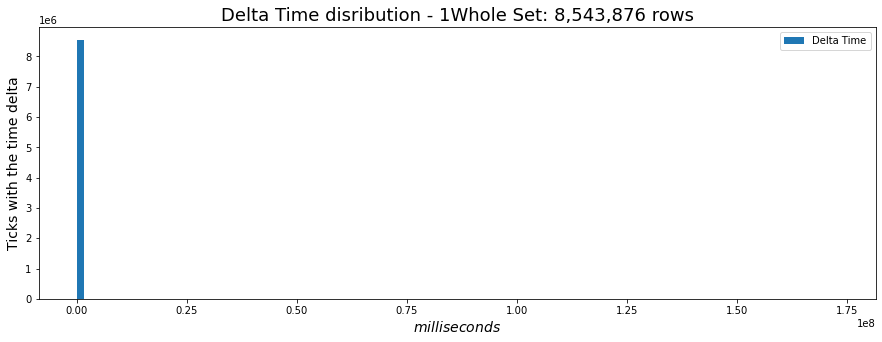

In [69]:
# full SET  8.543.876 rows

data_Delta_Time_Test_1 = np.array(data_Delta_Time) 
data_Delta_Time_Test_1 = data_Delta_Time_Test_1.reshape(8543876)

plt.figure(num=1, figsize=(15,5))
plt.hist(data_Delta_Time_Test_1, bins=100, label='Delta Time') 

plt.title('Delta Time disribution - 1Whole Set: 8,543,876 rows', size=18)
plt.ylabel('Ticks with the time delta', size=14)
plt.xlabel('$milliseconds$', size=14)
plt.legend(loc='upper right') 
#  PNG


In [ ]:
plt.savefig('Figures/TimeDisribution.png')

In [70]:
data[data.DateDelta1 > 20000].count()

Vol_Ask_N       7374
Ask_N_use       7374
DateDelta1_N    7374
Bid_N_use       7374
Vol_Bid_N       7374
Date            7374
Bid             7374
Ask             7374
Vol_Bid         7374
Vol_Ask         7374
DateT           7374
Bid_N           7374
Ask_N           7374
DateDelta       7374
DateDelta1      7374
dtype: int64

### Price distribution

In [71]:
# Weekends and date gups
#  DateDelta1 > 100000 mlsec
data[data.DateDelta1 > 169000000]

,Vol_Ask_N,Ask_N_use,DateDelta1_N,Bid_N_use,Vol_Bid_N,Date,Bid,Ask,Vol_Bid,Vol_Ask,DateT,Bid_N,Ask_N,DateDelta,DateDelta1
322405,0.075,0.185286,1.0,0.180714,0.075,2018.01.07 22:00:04.850,1.20265,1.20297,0.75,0.75,2018-01-07 22:00:04.850,0.590357,0.592643,1515362404849,172808585
781883,0.075,0.423143,1.0,0.419000,0.075,2018.01.14 22:00:04.641,1.21933,1.21962,0.75,0.75,2018-01-14 22:00:04.641,0.709500,0.711571,1515967204641,172812314
1318286,0.037,0.529714,1.0,0.528857,0.037,2018.01.21 22:00:14.074,1.22702,1.22708,0.37,0.37,2018-01-21 22:00:14.074,0.764429,0.764857,1516572014073,172817937
1932893,0.075,0.755857,1.0,0.747429,0.075,2018.01.28 22:00:34.413,1.24232,1.24291,0.75,0.75,2018-01-28 22:00:34.413,0.873714,0.877929,1517176834413,172839215
2560927,0.075,0.770143,1.0,0.760000,0.075,2018.02.04 22:00:04.598,1.24320,1.24391,0.75,0.75,2018-02-04 22:00:04.598,0.880000,0.885071,1517781604598,172804645
3262667,0.075,0.500143,1.0,0.497571,0.037,2018.02.11 22:00:14.329,1.22483,1.22501,0.37,0.75,2018-02-11 22:00:14.329,0.748786,0.750071,1518386414329,172818210
3818770,0.037,0.719286,1.0,0.716429,0.037,2018.02.18 22:00:14.462,1.24015,1.24035,0.37,0.37,2018-02-18 22:00:14.462,0.858214,0.859643,1518991214462,172820488
4316953,0.075,0.564714,1.0,0.561143,0.075,2018.02.25 22:00:04.559,1.22928,1.22953,0.75,0.75,2018-02-25 22:00:04.559,0.780571,0.782357,1519596004559,172808442
4840754,0.037,0.613714,1.0,0.606857,0.037,2018.03.04 22:00:08.704,1.23248,1.23296,0.37,0.37,2018-03-04 22:00:08.704,0.803429,0.806857,1520200808704,172812099
5371812,0.037,0.596571,1.0,0.584857,0.037,2018.03.11 21:00:07.329,1.23094,1.23176,0.37,0.37,2018-03-11 21:00:07.329,0.792429,0.798286,1520802007329,169215702


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543876 entries, 0 to 8543875
Data columns (total 15 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Vol_Ask_N     float64       
 1   Ask_N_use     float64       
 2   DateDelta1_N  float64       
 3   Bid_N_use     float64       
 4   Vol_Bid_N     float64       
 5   Date          object        
 6   Bid           float64       
 7   Ask           float64       
 8   Vol_Bid       float64       
 9   Vol_Ask       float64       
 10  DateT         datetime64[ns]
 11  Bid_N         float64       
 12  Ask_N         float64       
 13  DateDelta     int64         
 14  DateDelta1    int32         
dtypes: datetime64[ns](1), float64(11), int32(1), int64(1), object(1)
memory usage: 945.2+ MB


In [73]:
maxDateDelta1 = 20000
data['DateDelta1_N'] = data['DateDelta1'] / maxDateDelta1  
indexs_Big_DateDelta1 = data.index[data.DateDelta1_N > 1]
print('indexs_Big_DateDelta1:  ', indexs_Big_DateDelta1) 

indexs_Big_DateDelta1:   Int64Index([      5,      11,      28,      48,      89,     147,     149,
                159,     237,     624,
            ...
            8542705, 8542738, 8542750, 8542866, 8543548, 8543562, 8543615,
            8543629, 8543649, 8543787],
           dtype='int64', length=7374)


In [74]:
data[data.Date == 1]  # checking

,Vol_Ask_N,Ask_N_use,DateDelta1_N,Bid_N_use,Vol_Bid_N,Date,Bid,Ask,Vol_Bid,Vol_Ask,DateT,Bid_N,Ask_N,DateDelta,DateDelta1


In [75]:
data['DateDelta1_N'].loc[indexs_Big_DateDelta1] = 1 

C:\Users\vital\anaconda3_\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [76]:
data[data.Date == 1]  # checking

,Vol_Ask_N,Ask_N_use,DateDelta1_N,Bid_N_use,Vol_Bid_N,Date,Bid,Ask,Vol_Bid,Vol_Ask,DateT,Bid_N,Ask_N,DateDelta,DateDelta1


In [77]:
print(data.dtypes)
print(data.head(n=3)) 
print(data[-3:]) 

Vol_Ask_N              float64
Ask_N_use              float64
DateDelta1_N           float64
Bid_N_use              float64
Vol_Bid_N              float64
Date                    object
Bid                    float64
Ask                    float64
Vol_Bid                float64
Vol_Ask                float64
DateT           datetime64[ns]
Bid_N                  float64
Ask_N                  float64
DateDelta                int64
DateDelta1               int32
dtype: object
   Vol_Ask_N  Ask_N_use  DateDelta1_N  Bid_N_use  Vol_Bid_N  \
0      0.075   0.163286        0.0000   0.157429       0.15   
1      0.150   0.164000        0.0117   0.157429       0.15   
2      0.075   0.163857        0.0869   0.157429       0.15   

                      Date      Bid      Ask  Vol_Bid  Vol_Ask  \
0  2018.01.01 22:00:08.661  1.20102  1.20143      1.5     0.75   
1  2018.01.01 22:00:08.895  1.20102  1.20148      1.5     1.50   
2  2018.01.01 22:00:10.634  1.20102  1.20147      1.5     0.75   

   

In [78]:
# interval [0,1]
mmx  = data['DateDelta1_N'].max()
mmn  = data['DateDelta1_N'].min()
print(mmx, ' ', mmn)

1.0   0.0


Text(0.5, 0, '$Ask$')

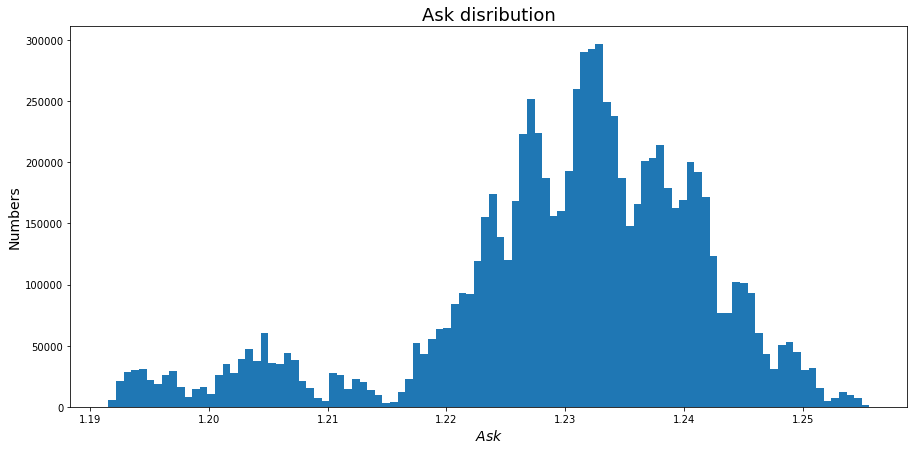

In [79]:
plt.figure(num=1, figsize=(15,7))
# plt.hist(data_volume_Ask_Test_1, normed=True) 
plt.hist(data["Ask"], bins=100, 
         #normed=True
        ) 
plt.title('Ask disribution', size=18)
plt.ylabel('Numbers', size=14)
plt.xlabel('$Ask$', size=14)


In [80]:
from tqdm import tqdm


In [81]:

data['Bid_N_200_3'] = 0.0
data['Ask_N_200_3'] = 0.0

data['Min_200'] = 0.0
data['Max_200'] = 0.0
data['Delta_200'] = 0.0


In [82]:
data_OK1 = data.drop(['Date','Vol_Bid','Vol_Ask','DateT','DateDelta','DateDelta1'], axis=1)

print(data_OK1.dtypes)
print(data_OK1.head(n=3)) 
print(data_OK1[-3:]) 

Vol_Ask_N       float64
Ask_N_use       float64
DateDelta1_N    float64
Bid_N_use       float64
Vol_Bid_N       float64
Bid             float64
Ask             float64
Bid_N           float64
Ask_N           float64
Bid_N_200_3     float64
Ask_N_200_3     float64
Min_200         float64
Max_200         float64
Delta_200       float64
dtype: object
   Vol_Ask_N  Ask_N_use  DateDelta1_N  Bid_N_use  Vol_Bid_N      Bid      Ask  \
0      0.075   0.163286        0.0000   0.157429       0.15  1.20102  1.20143   
1      0.150   0.164000        0.0117   0.157429       0.15  1.20102  1.20148   
2      0.075   0.163857        0.0869   0.157429       0.15  1.20102  1.20147   

      Bid_N     Ask_N  Bid_N_200_3  Ask_N_200_3  Min_200  Max_200  Delta_200  
0  0.578714  0.581643          0.0          0.0      0.0      0.0        0.0  
1  0.578714  0.582000          0.0          0.0      0.0      0.0        0.0  
2  0.578714  0.581929          0.0          0.0      0.0      0.0        0.0  
         

In [83]:

data_arr_8mio_OK = data_OK1.values

print('data_arr_8mio_OK (первые 10 строчек):', '\n', data_arr_8mio_OK[:10,:])
print(" type:        ", type(data_arr_8mio_OK), '\n',
      "size:         ", data_arr_8mio_OK.shape ,'\n')

data_arr_8mio_OK (первые 10 строчек): 
 [[0.075      0.16328571 0.         0.15742857 0.15       1.20102
  1.20143    0.57871429 0.58164286 0.         0.         0.
  0.         0.        ]
 [0.15       0.164      0.0117     0.15742857 0.15       1.20102
  1.20148    0.57871429 0.582      0.         0.         0.
  0.         0.        ]
 [0.075      0.16385714 0.0869     0.15742857 0.15       1.20102
  1.20147    0.57871429 0.58192857 0.         0.         0.
  0.         0.        ]
 [0.15       0.164      0.0295     0.15742857 0.15       1.20102
  1.20148    0.57871429 0.582      0.         0.         0.
  0.         0.        ]
 [0.075      0.16357143 0.9153     0.15742857 0.15       1.20102
  1.20145    0.57871429 0.58178571 0.         0.         0.
  0.         0.        ]
 [0.075      0.16357143 1.         0.15742857 0.15       1.20102
  1.20145    0.57871429 0.58178571 0.         0.         0.
  0.         0.        ]
 [0.15       0.164      0.00255    0.15742857 0.15       1.2

In [41]:
for s in tqdm(range(1,201)):
    data_arr_8mio_OK[s-1,7] = np.min(data_arr_8mio_OK[:s,0], axis=0)  
    data_arr_8mio_OK[s-1,8] = np.max(data_arr_8mio_OK[:s,1], axis=0)  
    
print('data_arr_8mio_OK :', '\n', data_arr_8mio_OK[:201,:9])
print(data_arr_8mio_OK[199,0])

100%|██████████| 200/200 [00:00<00:00, 50153.10it/s]

data_arr_8mio_OK : 
 [[1.20102 1.20143 0.15    ... 0.      1.20102 1.20143]
 [1.20102 1.20148 0.15    ... 0.      1.20102 1.20148]
 [1.20102 1.20147 0.15    ... 0.      1.20102 1.20148]
 ...
 [1.20099 1.20126 0.162   ... 0.      1.20007 1.20148]
 [1.20099 1.20124 0.15    ... 0.      1.20007 1.20148]
 [1.20101 1.20123 0.1     ... 0.      0.      0.     ]]
1.20099


In [94]:

for s in tqdm(range(200, n)):
    data_arr_8mio_OK[s,7] = np.min(data_arr_8mio_OK[s-200:s,0], axis=0)  
    data_arr_8mio_OK[s,8] = np.max(data_arr_8mio_OK[s-200:s,1], axis=0)  


#print(z, ' ', zz)
print('data_arr_8mio_OK (first 10 rows):', '\n', data_arr_8mio_OK[:8000000,:])
print("Dimentions of the arraw:         ", data_arr_8mio_OK.shape ,'\n')


  9%|▉         | 782982/8543676 [00:27<04:44, 27246.32it/s]


 18%|█▊        | 1559154/8543676 [00:54<04:49, 24118.97it/s]


 27%|██▋       | 2338520/8543676 [01:22<03:40, 28171.84it/s]


 37%|███▋      | 3124823/8543676 [01:49<03:32, 25458.07it/s]


 46%|████▌     | 3905379/8543676 [02:17<02:38, 29220.76it/s]


 55%|█████▍    | 4682133/8543676 [02:45<02:28, 25975.38it/s]


 64%|██████▍   | 5459208/8543676 [03:12<01:55, 26636.11it/s]


 73%|███████▎  | 6244124/8543676 [03:40<01:28, 25903.09it/s]


 82%|████████▏ | 7019288/8543676 [04:07<00:55, 27325.92it/s]


 91%|█████████▏| 7812363/8543676 [04:35<00:27, 26337.01it/s]


100%|██████████| 8543676/8543676 [05:00<00:00, 28441.79it/s]

data_arr_8mio_OK (первые 10 строчек): 
 [[ 1.20102  1.20143  0.15    ...,  1.20102  1.20143  0.     ]
 [ 1.20102  1.20148  0.15    ...,  1.20102  1.20148  0.     ]
 [ 1.20102  1.20147  0.15    ...,  1.20102  1.20148  0.     ]
 ..., 
 [ 1.23416  1.2342   0.491   ...,  1.23411  1.23467  0.     ]
 [ 1.23416  1.23418  0.454   ...,  1.23411  1.23467  0.     ]
 [ 1.23415  1.23419  0.604   ...,  1.23411  1.23467  0.     ]]
Размерность массива:          (8543876, 10) 



In [96]:

for s in range(n):
    data_arr_8mio_OK[s,9] = data_arr_8mio_OK[s,8] - data_arr_8mio_OK[s,7]


np.set_printoptions(precision=5, suppress=True)

print('data_arr_8mio_OK (first 10 rows):', '\n', data_arr_8mio_OK[:8000000,:])
print("Array dimention:         ", data_arr_8mio_OK.shape ,'\n')

data_arr_8mio_OK (первые 10 строчек): 
 [[ 1.20102  1.20143  0.15    ...,  1.20102  1.20143  0.00041]
 [ 1.20102  1.20148  0.15    ...,  1.20102  1.20148  0.00046]
 [ 1.20102  1.20147  0.15    ...,  1.20102  1.20148  0.00046]
 ..., 
 [ 1.23416  1.2342   0.491   ...,  1.23411  1.23467  0.00056]
 [ 1.23416  1.23418  0.454   ...,  1.23411  1.23467  0.00056]
 [ 1.23415  1.23419  0.604   ...,  1.23411  1.23467  0.00056]]
Размерность массива:          (8543876, 10) 



In [97]:

for s in tqdm(range(n)):
    
    data_arr_8mio_OK[s,5] = ( data_arr_8mio_OK[s,0] - data_arr_8mio_OK[s,7] ) / data_arr_8mio_OK[s,9]
    
    data_arr_8mio_OK[s,6] = ( data_arr_8mio_OK[s,1] - data_arr_8mio_OK[s,7] ) / data_arr_8mio_OK[s,9]


print('data_arr_8mio_OK (first 10 rows):', '\n', data_arr_8mio_OK[:8000000,:])
print("Array dimention:         ", data_arr_8mio_OK.shape ,'\n')


100%|██████████| 8543876/8543876 [00:21<00:00, 394294.60it/s]

data_arr_8mio_OK (первые 10 строчек): 
 [[ 1.20102  1.20143  0.15    ...,  1.20102  1.20143  0.00041]
 [ 1.20102  1.20148  0.15    ...,  1.20102  1.20148  0.00046]
 [ 1.20102  1.20147  0.15    ...,  1.20102  1.20148  0.00046]
 ..., 
 [ 1.23416  1.2342   0.491   ...,  1.23411  1.23467  0.00056]
 [ 1.23416  1.23418  0.454   ...,  1.23411  1.23467  0.00056]
 [ 1.23415  1.23419  0.604   ...,  1.23411  1.23467  0.00056]]
Размерность массива:          (8543876, 10) 



In [ ]:

mmx  = np.max(data_arr_8mio_OK[:,5], axis=0)  
mmn  = np.min(data_arr_8mio_OK[:,5], axis=0)  
print(mmx, ' ', mmn)

mmx  = np.max(data_arr_8mio_OK[:,6], axis=0)  
mmn  = np.min(data_arr_8mio_OK[:,6], axis=0)  
print(mmx, ' ', mmn)


In [ ]:
#for s in tqdm(range(200, n)):
s= 250
data_arr_8mio_OK[s,7] = np.min(data_arr_8mio_OK[s-200:s,0], axis=0)  
data_arr_8mio_OK[s,8] = np.max(data_arr_8mio_OK[s-200:s,1], axis=0)  

In [ ]:


data['Bid_N_200'] = (data['Bid'] - data['Min_200']) / (data['Max_200'] - data['Min_200'])
data['Ask_N_200'] = (data['Ask'] - data['Min_200']) / (data['Max_200'] - data['Min_200'])

In [ ]:
print(data.dtypes)
print(data.head(n=210)) 
print(data[-5:]) 

In [ ]:

for s in tqdm(range(200, n)):
    data['Min_200'].loc[s] = data[s-200:s]['Bid'].min()
    data['Max_200'].loc[s] = data[s-200:s]['Ask'].max()
    
data['Bid_N_200'] = (data['Bid'] - data['Min_200']) / (data['Max_200'] - data['Min_200'])
data['Ask_N_200'] = (data['Ask'] - data['Min_200']) / (data['Max_200'] - data['Min_200'])

print(data.dtypes)
print(data.head(n=202)) 
print(data[-5:]) 

In [ ]:
# Forex EURUSD 
N1=3000000   
KK = 200  е
N2= N1+KK  

plt.style.use('seaborn-darkgrid') 
#plt.ion()
fig = plt.figure(figsize=(17,6),  
                 linewidth=1,     
                 )  

ax = fig.add_subplot(111)

ax.set_xlabel('Date', size=18) 
ax.set_ylabel('Bid,Ask', size=14) 
ax.set_title('Price Ticks graph', size=14) 
 

line1, = ax.plot(data[N1:N2]['Bid_N_use'])
line2, = ax.plot(data[N1:N2]['Ask_N_use'])
line3, = ax.plot(data[N1:N2]['Vol_Bid_N'])

plt.show()

In [ ]:
s=200
print(data[s:s+1]['Bid'])
print(data['Date'].loc[s], data['Bid'].loc[s])


In [ ]:
def max_200

def map_to_percent(r):
    return [float(v)/sum(r) for v in r]


Freq_by_survived.apply(map_to_percent, axis=1)

In [ ]:

DeltaNorma_200 = maxPriceUse - minPriceUse

data['Bid_N'] = (data['Bid'] - minPriceUse) / DeltaNorma_200
data['Ask_N'] = (data['Ask'] - minPriceUse) / DeltaNorma_200 

print(data.dtypes)
print(data.head(n=5)) 
print(data[-5:]) 

In [ ]:
s = 1000000
i = 200
max_200 = data[s:s+i]['Bid'].max()
max_200

In [ ]:
s = 1000000
i = 200
min_200 = data[s:s+i]['Bid'].min()
min_200

In [ ]:
i = 200
data[0:i]

#### Tick distribution

In [ ]:
data_Delta_Time  = data['DateDelta1']

print('data_Delta_Time', data_Delta_Time.dtypes)
print(data_Delta_Time[:5]) 
print(data_Delta_Time[-5:]) 

In [ ]:
# first 1.000 rows

indexes_to_drop = np.array(range(1000,8543876))
indexes_to_keep = set(range(data_Delta_Time.shape[0])) - set(indexes_to_drop)

data_Delta_Time_Test = data_Delta_Time.take(list(indexes_to_keep))


data_Delta_Time_Test_1 = np.array(data_Delta_Time_Test) 
data_Delta_Time_Test_1 = data_Delta_Time_Test_1.reshape(1000)


plt.figure(num=1, figsize=(15,5))
plt.hist(data_Delta_Time_Test_1, bins=100, label='Delta Time', normed=True) 


plt.title('Delta Time disribution - 1,000 rows', size=18)
plt.ylabel('Ticks with the time delta', size=14)
plt.xlabel('$milliseconds$', size=14)
plt.legend(loc='upper right') 

plt.savefig('Figures/TimeDisribution-1000_rows.png')

In [ ]:
# First 10.000 rows

indexes_to_drop = np.array(range(10000,8543876))
indexes_to_keep = set(range(data_Delta_Time.shape[0])) - set(indexes_to_drop)

data_Delta_Time_Test = data_Delta_Time.take(list(indexes_to_keep))


data_Delta_Time_Test_1 = np.array(data_Delta_Time_Test) 
data_Delta_Time_Test_1 = data_Delta_Time_Test_1.reshape(10000)

plt.figure(num=1, figsize=(15,5))
plt.hist(data_Delta_Time_Test_1, bins=100, label='Delta Time', normed=True) 


plt.title('Delta Time disribution - 10,000 rows', size=18)
plt.ylabel('Ticks with the time delta', size=14)
plt.xlabel('$milliseconds$', size=14)
plt.legend(loc='upper right') 

plt.savefig('Figures/TimeDisribution-10000_rows.png')

In [ ]:
# First 100.000 rows

indexes_to_drop = np.array(range(100000,8543876))
indexes_to_keep = set(range(data_Delta_Time.shape[0])) - set(indexes_to_drop)

data_Delta_Time_Test = data_Delta_Time.take(list(indexes_to_keep))

data_Delta_Time_Test_1 = np.array(data_Delta_Time_Test) 
data_Delta_Time_Test_1 = data_Delta_Time_Test_1.reshape(100000)

plt.figure(num=1, figsize=(15,5))
plt.hist(data_Delta_Time_Test_1, bins=100, label='Delta Time', normed=True) 


plt.title('Delta Time disribution - 100,000 rows', size=18)
plt.ylabel('Ticks with the time delta', size=14)
plt.xlabel('$milliseconds$', size=14)
plt.legend(loc='upper right') 

plt.savefig('Figures/TimeDisribution-100000_rows.png')

In [ ]:
# Whole dataset 8.543.876 rows

data_Delta_Time_Test_1 = np.array(data_Delta_Time) 
data_Delta_Time_Test_1 = data_Delta_Time_Test_1.reshape(8543876)

plt.figure(num=1, figsize=(15,5))
plt.hist(data_Delta_Time_Test_1, bins=100, label='Delta Time', normed=True) 

plt.title('Delta Time disribution - 1Whole Set: 8,543,876 rows', size=18)
plt.ylabel('Ticks with the time delta', size=14)
plt.xlabel('$milliseconds$', size=14)
plt.legend(loc='upper right') 

plt.savefig('Figures/TimeDisribution.png')

In [ ]:
# Majority tick interwals are in the range [0; 20.000]


In [ ]:
data[data.DateDelta1 > 20000].count()

In [ ]:
file_obj1 = open('Tick/EURUSD_tick_4mth.csv', 'w')
data_4_mth.to_csv('Tick/EURUSD_tick_4mth.csv', 
                  encoding='utf-8', index=False)
file_obj1.close()

file_obj2 = open('Tick/EURUSD_tick_4mth_All.csv', 'w')
data_4_mth_All.to_csv('Tick/EURUSD_tick_4mth_All.csv', 
                  encoding='utf-8', index=False)
file_obj2.close()

In [ ]:
n_start = 7700000  
n_small = 8543000  # each 3 weeks
print('n_start = ',n_start, '\n', 
      'n_small = ', n_small)

In [ ]:

data_4_mth_8week =  data_4_mth[n_start:n_small]
data_4_mth_All_8week = data_4_mth_All[n_start:n_small]

print(data_4_mth.iloc[[n_start,n_start+1],]) 
print(data_4_mth.iloc[[n_small-2,n_small-1],]) 
print('\n')
print(data_4_mth_8week.head(n=2)) 
print(data_4_mth_8week[-2:]) 
print('\n')
print(data_4_mth_All.iloc[[n_start,n_start+1],]) 
print(data_4_mth_All.iloc[[n_small-2,n_small-1],]) 
print('\n')
print(data_4_mth_All_8week.head(n=2)) 
print(data_4_mth_All_8week[-2:]) 


In [ ]:

file_obj3 = open('Tick/EURUSD_tick_4mth_8week.csv', 'w')
data_4_mth_8week.to_csv('Tick/EURUSD_tick_4mth_8week.csv', 
                        encoding='utf-8', index=False)
file_obj3.close()

file_obj4 = open('Tick/EURUSD_tick_4mth_All_8week.csv', 'w')
data_4_mth_All_8week.to_csv('Tick/EURUSD_tick_4mth_All_8week.csv', 
                            encoding='utf-8', index=False)
file_obj4.close()

##### Volume distribution (Ask и Bid)

In [ ]:
from collections import Counter


In [ ]:
# First 1.000 rows

indexes_to_drop = np.array(range(1000,8543876))
indexes_to_keep = set(range(data_volume_Ask.shape[0])) - set(indexes_to_drop)
data_volume_Ask_Test = data_volume_Ask.take(list(indexes_to_keep))
data_volume_Bid_Test = data_volume_Bid.take(list(indexes_to_keep))
# print('data_volume_Ask_Test', data_volume_Ask_Test.dtypes)
# print(data_volume_Ask_Test[-5:]) 

data_volume_Ask_Test_1  = data_volume_Ask_Test.drop(['Date'], axis=1)
data_volume_Bid_Test_1  = data_volume_Bid_Test.drop(['Date'], axis=1)

data_volume_Ask_Test_1 = np.array(data_volume_Ask_Test_1) 
data_volume_Ask_Test_1 = data_volume_Ask_Test_1.reshape(1000)
data_volume_Bid_Test_1 = np.array(data_volume_Bid_Test_1) 
data_volume_Bid_Test_1 = data_volume_Bid_Test_1.reshape(1000)

plt.figure(num=1, figsize=(15,5))
plt.hist(data_volume_Bid_Test_1, bins=100, label='Volume Bid', normed=True) 
plt.hist(data_volume_Ask_Test_1, bins=100, label='Volume Ask', normed=True) 

plt.title('Volume disribution - 1,000 rows', size=18)
plt.ylabel('Lots', size=14)
plt.xlabel('$Volume$', size=14)
plt.legend(loc='upper right') 
plt.savefig('Figures/VolumeAskDistribution-1000_rows.png')

In [ ]:
# First 10.000 rows

indexes_to_drop = np.array(range(10000,8543876))
indexes_to_keep = set(range(data_volume_Ask.shape[0])) - set(indexes_to_drop)
data_volume_Ask_Test = data_volume_Ask.take(list(indexes_to_keep))
data_volume_Bid_Test = data_volume_Bid.take(list(indexes_to_keep))

data_volume_Ask_Test_1  = data_volume_Ask_Test.drop(['Date'], axis=1)
data_volume_Bid_Test_1  = data_volume_Bid_Test.drop(['Date'], axis=1)

data_volume_Ask_Test_1 = np.array(data_volume_Ask_Test_1) 
data_volume_Ask_Test_1 = data_volume_Ask_Test_1.reshape(10000)
data_volume_Bid_Test_1 = np.array(data_volume_Bid_Test_1) 
data_volume_Bid_Test_1 = data_volume_Bid_Test_1.reshape(10000)

plt.figure(num=1, figsize=(15,5))
plt.hist(data_volume_Bid_Test_1, bins=100, label='Volume Bid', normed=True) 
plt.hist(data_volume_Ask_Test_1, bins=100, label='Volume Ask', normed=True) 

plt.title('Volume disribution - 10,000 rows', size=18)
plt.ylabel('Lots', size=14)
plt.xlabel('$Volume$', size=14)
plt.legend(loc='upper right') 
plt.savefig('Figures/VolumeAskDistribution-10000_rows.png')

In [ ]:
# First 100.000 rows

indexes_to_drop = np.array(range(100000,8543876))
indexes_to_keep = set(range(data_volume_Ask.shape[0])) - set(indexes_to_drop)
data_volume_Ask_Test = data_volume_Ask.take(list(indexes_to_keep))
data_volume_Bid_Test = data_volume_Bid.take(list(indexes_to_keep))


data_volume_Ask_Test_1  = data_volume_Ask_Test.drop(['Date'], axis=1)
data_volume_Bid_Test_1  = data_volume_Bid_Test.drop(['Date'], axis=1)

data_volume_Ask_Test_1 = np.array(data_volume_Ask_Test_1) 
data_volume_Ask_Test_1 = data_volume_Ask_Test_1.reshape(100000)
data_volume_Bid_Test_1 = np.array(data_volume_Bid_Test_1) 
data_volume_Bid_Test_1 = data_volume_Bid_Test_1.reshape(100000)


plt.figure(num=1, figsize=(15,5))
plt.hist(data_volume_Bid_Test_1, bins=100, label='Volume Bid', normed=True) 
plt.hist(data_volume_Ask_Test_1, bins=100, label='Volume Ask', normed=True) 


plt.title('Volume disribution - 100,000 rows', size=18)
plt.ylabel('Lots', size=14)
plt.xlabel('$Volume$', size=14)
plt.legend(loc='upper right') 
plt.savefig('Figures/VolumeAskDistribution-100000_rows.png')

In [ ]:
# Whole dataset 8.543.876 rows

data_volume_Ask_Test_1  = data_volume_Ask.drop(['Date'], axis=1)
data_volume_Bid_Test_1  = data_volume_Bid.drop(['Date'], axis=1)

data_volume_Ask_Test_1 = np.array(data_volume_Ask_Test_1) 
data_volume_Ask_Test_1 = data_volume_Ask_Test_1.reshape(8543876)
data_volume_Bid_Test_1 = np.array(data_volume_Bid_Test_1) 
data_volume_Bid_Test_1 = data_volume_Bid_Test_1.reshape(8543876)

plt.figure(num=1, figsize=(15,5))
plt.hist(data_volume_Bid_Test_1, bins=100, label='Volume Bid', normed=True) 
plt.hist(data_volume_Ask_Test_1, bins=100, label='Volume Ask', normed=True) 

plt.title('Volume disribution - Whole Set: 8,543,876 rows', size=18)
plt.ylabel('Lots', size=14)
plt.xlabel('$Volume$', size=14)
plt.legend(loc='upper right') 
plt.savefig('Figures/VolumeAskDistribution.png')

In [ ]:
data_ = pd.read_csv('/Tick/EURUSD_tick_4mth_4week_200_33th-39th.csv')

print(data_.head(n=5)) 
print(data_[-5:]) 

In [ ]:
data_.info()

In [ ]:
data = pd.read_csv('Tick/EURUSD_tick_4mth_4week_200_.csv')

print(data.head(n=5)) 
print(data[-5:]) 

In [ ]:
data.info()

In [ ]:
columns2 = ['Date','Bid','Ask','Vol_Bid','Vol_Ask','DateT','Bid_N','Ask_N','Bid_N_use','Ask_N_use',
           'Vol_Bid_N','Vol_Ask_N','DateDelta','DateDelta1','DateDelta1_N']
data_.drop(columns2, inplace=True, axis=1)
data_.info()

In [ ]:
columns3 = ['Date','Bid','Ask','Vol_Bid','Vol_Ask','DateT',
           'DateDelta','DateDelta1','DateDelta1_N']
data.drop(columns3, inplace=True, axis=1)
data.info()

In [ ]:

data_both = data_.append(data, ignore_index=True)

print(data_both.info())
print(data_both.head(n=600006)) 
print(data_both[-5:]) 

In [ ]:
data_both[data_both.Min_200_3 <= 0]

In [ ]:
data_both[data_both.Max_200_3 <= 0]

In [ ]:
data_both[data_both.Delta_200_3 <= 0]

In [ ]:
data_both['Min_200_3'].loc[0:200] = 1.22681
data_both['Max_200_3'].loc[0:200] = 1.22726
data_both['Delta_200_3'].loc[0:200] = data_both['Max_200_3'].loc[0:200] - data_both['Min_200_3'].loc[0:200]

In [ ]:
file_obj5 = open('Tick/EURUSD_tick_real-4.csv', 'w')
data_both.to_csv('Tick/EURUSD_tick_real-4.csv', 
                  encoding='utf-8', index=False)
file_obj5.close()

In [ ]:
# 4 weeks
data_ = pd.read_csv('Tick/EURUSD_tick_4mth_4week_200_33th-39th.csv')

print(data_.head(n=5)) 
print(data_[-5:]) 

In [ ]:

data = pd.read_csv('Tick/EURUSD_tick_4mth_4week_200_.csv')

In [ ]:
data_OK1=data_.drop(['Date','Vol_Bid','Vol_Ask','DateT','Bid_N','Ask_N',
                   'Bid_N_use','Ask_N_use','DateDelta','DateDelta1','Min_200_3','Max_200_3','Delta_200_3'],axis=1) 

print(data_OK1.info())
print(data_OK1.head(n=5)) 
print(data_OK1[-5:])

In [ ]:
data_OK2=data.drop(['Date','Vol_Bid','Vol_Ask','DateT',
                   'DateDelta','DateDelta1','Min_200_3','Max_200_3','Delta_200_3'],axis=1) 

print(data_OK2.info())
print(data_OK2.head(n=5))
print(data_OK2[-5:]) 

In [ ]:

data_OK = data_OK1.append(data_OK2, ignore_index=True)

print(data_OK.info())
print(data_OK.head(n=600006)) 
print(data_OK[-5:])

In [ ]:

data_OK['Bid_N_200_3'] = (data_OK['Bid'] - data_both['Min_200_3']) / data_both['Delta_200_3']
data_OK['Ask_N_200_3'] = (data_OK['Ask'] - data_both['Min_200_3']) / data_both['Delta_200_3']

print(data_OK.info())
print(data_OK.head(n=5)) 
print(data_OK[-5:])

In [ ]:

print(data_OK['Bid_N_200_3'].min(), '  ', data_OK['Bid_N_200_3'].max())
print(data_OK['Ask_N_200_3'].min(), '  ', data_OK['Ask_N_200_3'].max())

In [ ]:
data_OK = data_OK.drop(['Ask','Bid'],axis=1) 

print(data_OK.info())
print(data_OK.head(n=5)) 
print(data_OK[-5:]) 

In [ ]:
data_OK = data_OK[['Vol_Ask_N','Ask_N_200_3','DateDelta1_N','Bid_N_200_3','Vol_Bid_N']]

print(data_OK.info())
print(data_OK.head(n=5)) 
print(data_OK[-5:]) 

In [ ]:

file_obj3 = open('Tick/EURUSD_tick_OK-3.csv', 'w')
data_OK.to_csv('Tick/EURUSD_tick_OK-3.csv', 
                  encoding='utf-8', index=False)
file_obj3.close()